<a href="https://colab.research.google.com/github/Tar-ive/find-fund/blob/main/recommendation_engine/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
from google.oauth2 import service_account
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload, MediaIoBaseDownload

class GoogleDriveHandler:
    def __init__(self, credentials_path):
        """Initialize Google Drive service with credentials"""
        self.credentials = service_account.Credentials.from_service_account_file(
            credentials_path,
            scopes=['https://www.googleapis.com/auth/drive.file']
        )
        self.service = build('drive', 'v3', credentials=self.credentials)

    def list_files(self, folder_id):
        """List all files in a folder"""
        query = f"'{folder_id}' in parents"
        results = self.service.files().list(
            q=query,
            fields="files(id, name)"
        ).execute()
        return results.get('files', [])

    def download_file(self, file_id):
        """Download a file from Google Drive"""
        request = self.service.files().get_media(fileId=file_id)
        file = io.BytesIO()
        downloader = MediaIoBaseDownload(file, request)
        done = False
        while not done:
            _, done = downloader.next_chunk()
        file.seek(0)
        return file

    def upload_file(self, file_path, folder_id):
        """Upload a file to Google Drive"""
        file_metadata = {
            'name': 'funding.csv',
            'parents': [folder_id]
        }
        media = MediaFileUpload(
            file_path,
            mimetype='text/csv',
            resumable=True
        )
        file = self.service.files().create(
            body=file_metadata,
            media_body=media,
            fields='id'
        ).execute()
        return file.get('id')

def combine_and_analyze_data():
    # Initialize Google Drive handler
    CREDENTIALS_PATH = '/content/credentials.json'  # Update this path
    FOLDER_ID = '11gcojUFSG6Xgx8usCZjbYXePSArZTL43'

    drive_handler = GoogleDriveHandler(CREDENTIALS_PATH)

    # Get list of files in folder
    print("Getting list of files...")
    files = drive_handler.list_files(FOLDER_ID)

    # Combine all CSV files matching the pattern
    print("\nCombining CSV files...")
    all_data = []
    for file in files:
        if file['name'].startswith('funded_works_chunk_') and file['name'].endswith('.csv'):
            print(f"Processing {file['name']}...")
            try:
                file_content = drive_handler.download_file(file['id'])
                df = pd.read_csv(file_content)
                all_data.append(df)
            except Exception as e:
                print(f"Error processing {file['name']}: {e}")

    # Combine all dataframes
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)

        # Display basic information about the data
        print("\nData Overview:")
        print("-" * 50)
        print(f"Total number of records: {len(combined_df):,}")
        print(f"Number of columns: {len(combined_df.columns)}")

        # Display column names
        print("\nColumns in the dataset:")
        print("-" * 50)
        for col in combined_df.columns:
            print(col)

        # Display missing values information
        print("\nMissing Values Analysis:")
        print("-" * 50)
        missing_info = pd.DataFrame({
            'Column': combined_df.columns,
            'Missing Values': combined_df.isnull().sum(),
            'Missing Percentage': (combined_df.isnull().sum() / len(combined_df) * 100).round(2)
        })
        print(missing_info.to_string())

        # Save combined data locally
        print("\nSaving combined data...")
        combined_file = "main_funding.csv"
        combined_df.to_csv(combined_file, index=False)

        # Upload combined file to Google Drive
        print("\nUploading combined file to Google Drive...")
        file_id = drive_handler.upload_file(combined_file, FOLDER_ID)
        print(f"Combined file uploaded successfully with ID: {file_id}")

        return combined_df
    else:
        print("No files found to combine.")
        return None

if __name__ == "__main__":
    # Execute the combination and analysis
    df = combine_and_analyze_data()

Getting list of files...

Combining CSV files...
Processing funded_works_chunk_83.csv...
Processing funded_works_chunk_82.csv...
Processing funded_works_chunk_81.csv...
Processing funded_works_chunk_80.csv...
Processing funded_works_chunk_79.csv...
Processing funded_works_chunk_78.csv...
Processing funded_works_chunk_77.csv...
Processing funded_works_chunk_76.csv...
Processing funded_works_chunk_75.csv...
Processing funded_works_chunk_74.csv...
Processing funded_works_chunk_73.csv...
Processing funded_works_chunk_72.csv...
Processing funded_works_chunk_71.csv...
Processing funded_works_chunk_70.csv...
Processing funded_works_chunk_69.csv...
Processing funded_works_chunk_68.csv...
Processing funded_works_chunk_67.csv...
Processing funded_works_chunk_66.csv...
Processing funded_works_chunk_65.csv...
Processing funded_works_chunk_64.csv...
Processing funded_works_chunk_63.csv...
Processing funded_works_chunk_62.csv...
Processing funded_works_chunk_61.csv...
Processing funded_works_chunk_6

In [ ]:
df= pd.read_csv('/content/funding.csv')

In [ ]:
researchers_df = pd.read_csv('/content/researchers.csv')
# funding_df = pd.read_csv('/content/funding.csv')

In [ ]:
# prompt: now print shape of both dfs, their dtypes. missing values if any. print values in a neat table

import pandas as pd

# Assuming 'researchers_df' and 'funding_df' are already defined as in your provided code.

print("Shape of researchers_df:", researchers_df.shape)
print("\nData types of researchers_df:\n", researchers_df.dtypes)
print("\nMissing values in researchers_df:\n", researchers_df.isnull().sum())
print("\nResearchers DataFrame:")
print(researchers_df.head()) # Print the first few rows for a preview

print("\nShape of funding_df:", df.shape)
print("\nData types of funding_df:\n", df.dtypes)
print("\nMissing values in funding_df:\n", df.isnull().sum())
print("\nFunding DataFrame:")
print(df.head()) # Print the first few rows for a preview

Shape of researchers_df: (100, 46)

Data types of researchers_df:
 researcher_id           object
researcher_name         object
total_citations          int64
total_works              int64
h_index                  int64
i10_index                int64
concept_1               object
concept_1_score        float64
concept_2               object
concept_2_score        float64
years_active             int64
recent_works_count       int64
recent_citations         int64
unique_venues            int64
avg_coauthors          float64
open_access_ratio      float64
top_work_1_id           object
top_work_1_type         object
top_work_1_is_oa          bool
top_work_1_keywords     object
top_work_1_source       object
top_work_2_id           object
top_work_2_type         object
top_work_2_is_oa          bool
top_work_2_keywords     object
top_work_2_source       object
top_work_3_id           object
top_work_3_type         object
top_work_3_is_oa          bool
top_work_3_keywords     object
top

In [ ]:
# Step 1: Extract keywords from researchers_df
import pandas as pd
funding_df= df
import pandas as pd
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import numpy as np

# Step 1: Extract keywords from researchers_df
def extract_keywords(researchers_df):
    keyword_columns = [f'top_work_{i}_keywords' for i in range(1, 6)]
    researcher_keywords = set()
    for col in keyword_columns:
        if col in researchers_df.columns:
            for keywords in researchers_df[col]:
                if pd.notna(keywords):
                    researcher_keywords.update(keywords.split(','))
    return list(researcher_keywords)

# Step 2: Filter funding_df based on researcher keywords
def filter_funding_df(funding_df, keywords):
    def keywords_match(funding_keywords, keywords_set):
        if pd.isna(funding_keywords):
            return False
        funding_keywords_set = set(funding_keywords.split(','))
        return not funding_keywords_set.isdisjoint(keywords_set)

    keywords_set = set(keywords)
    funding_df['is_relevant'] = funding_df['keywords'].apply(lambda x: keywords_match(x, keywords_set))
    filtered_df = funding_df[funding_df['is_relevant']].copy()
    return filtered_df

# Step 3: Generate embeddings for work titles
def generate_embeddings(df, model_name='sentence-transformers/all-MiniLM-L6-v2'):
    model = SentenceTransformer(model_name)
    titles = df['work_title'].fillna('').tolist()
    embeddings = model.encode(titles, batch_size=128, show_progress_bar=True)
    return embeddings

# Step 4: Perform clustering and sample from each cluster
def cluster_and_sample(df, embeddings, n_clusters=10, sample_per_cluster=1000):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(embeddings)

    # Sample from each cluster
    sampled_df = df.groupby('cluster', group_keys=False).apply(lambda x: x.sample(min(len(x), sample_per_cluster)))
    return sampled_df

# Main script
def main():
    # Load data (assuming researchers_df and funding_df are already loaded)

    # Step 1: Extract keywords
    researcher_keywords = extract_keywords(researchers_df)

    # Step 2: Filter funding_df
    filtered_funding_df = filter_funding_df(funding_df, researcher_keywords)
    print(f"Filtered funding_df shape: {filtered_funding_df.shape}")

    # Step 3: Generate embeddings
    embeddings = generate_embeddings(filtered_funding_df)

    # Step 4: Cluster and sample
    sampled_funding_df = cluster_and_sample(filtered_funding_df, embeddings, n_clusters=10, sample_per_cluster=1000)
    print(f"Sampled funding_df shape: {sampled_funding_df.shape}")

    # Optional: Save the final dataset
    sampled_funding_df.to_csv('sampled_funding_data.csv', index=False)

if __name__ == "__main__":
    main()

Filtered funding_df shape: (10297, 15)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/81 [00:00<?, ?it/s]

<ipython-input-14-44f4c0fac4bb>:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('cluster', group_keys=False).apply(lambda x: x.sample(min(len(x), sample_per_cluster)))


Sampled funding_df shape: (8479, 16)


In [ ]:
sampled_df= pd.read_csv('/content/sampled_funding_data.csv')

In [ ]:
sampled_df

,work_id,work_title,publication_year,publication_date,work_type,cited_by_count,is_retracted,language,journal,funder_count,funders,award_ids,funder_ids,keywords,is_relevant,cluster
0,https://openalex.org/W2119264846,Temporal QoS-aware web service recommendation ...,2014,2014-04-07,article,123,False,en,NaN,5,National Natural Science Foundation of China; ...,"No. 61103031, No. 61370057; 2012AA011203; No. ...",https://openalex.org/F4320321001; https://open...,Mobile QoS,True,0
1,https://openalex.org/W1936679285,Workflow scheduling in cloud: a survey,2015,2015-05-13,article,238,False,en,The Journal of Supercomputing,1,National Natural Science Foundation of China,61202121,https://openalex.org/F4320321001,Provisioning,True,0
2,https://openalex.org/W4391652935,In-sensor dynamic computing for intelligent ma...,2024,2024-02-08,article,26,False,en,Nature Electronics,6,National Natural Science Foundation of China; ...,61921005; 62034004; 62122036; 61974176; 623041...,https://openalex.org/F4320321001; https://open...,Tracking (education),True,0
3,https://openalex.org/W4285272834,Popularity-Aware and Diverse Web APIs Recommen...,2022,2022-05-02,article,67,False,en,IEEE Transactions on Computational Social Systems,2,National Natural Science Foundation of China; ...,62177014; ZR2019MF001,https://openalex.org/F4320321001; https://open...,Popularity,True,0
4,https://openalex.org/W2912493354,A Systematic Review of Perception System and S...,2019,2019-02-05,review,380,False,en,Sensors,3,Fundación Séneca; Ministerio de Economía y Com...,19895/GERM/15; BFU2017-88300-C2-2-R; SPIP2017-...,https://openalex.org/F4320310087; https://open...,Strengths and weaknesses,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474,https://openalex.org/W2792825853,Soil heavy metal pollution and risk assessment...,2018,2018-03-07,article,105,False,en,Environmental Monitoring and Assessment,1,"Ministerstvo Školství, Mládeže a Tělovýchovy",LO1404,https://openalex.org/F4320321005,Soil test,True,9
8475,https://openalex.org/W2091154954,Hysteretic swelling of wood at cellular scale ...,2010,2010-08-25,article,118,False,en,Journal of Structural Biology,1,Schweizerischer Nationalfonds zur Förderung de...,125184,https://openalex.org/F4320320924,Shrinkage,True,9
8476,https://openalex.org/W3183835656,Biodegradation of polyethylene and polypropyle...,2021,2021-07-15,article,153,False,en,Polymer Degradation and Stability,1,National Research Foundation of Korea,NaN,https://openalex.org/F4320322120,Polypropylene,True,9
8477,https://openalex.org/W4315651595,A Digital Product Passport for Critical Raw Ma...,2023,2023-01-11,article,54,False,en,Sustainability,1,European Commission,958448,https://openalex.org/F4320320300,Component (thermodynamics),True,9


In [ ]:
print("\nShape of funding_df:", sampled_df.shape)
print("\nData types of funding_df:\n", sampled_df.dtypes)
print("\nMissing values in funding_df:\n", sampled_df.isnull().sum())



Shape of funding_df: (8479, 16)

Data types of funding_df:
 work_id             object
work_title          object
publication_year     int64
publication_date    object
work_type           object
cited_by_count       int64
is_retracted          bool
language            object
journal             object
funder_count         int64
funders             object
award_ids           object
funder_ids          object
keywords            object
is_relevant           bool
cluster              int64
dtype: object

Missing values in funding_df:
 work_id                0
work_title             0
publication_year       0
publication_date       0
work_type              0
cited_by_count         0
is_retracted           0
language               0
journal               51
funder_count           0
funders                0
award_ids           1737
funder_ids             0
keywords               0
is_relevant            0
cluster                0
dtype: int64


In [ ]:
sampled_funding_df = sampled_df

In [ ]:
# Remove rows with missing 'journal'
sampled_funding_df = sampled_funding_df.dropna(subset=['journal'])

# Fill missing 'award_ids' with 'NaN'
sampled_funding_df['award_ids'].fillna('NaN', inplace=True)

<ipython-input-22-7337445a9168>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampled_funding_df['award_ids'].fillna('NaN', inplace=True)
<ipython-input-22-7337445a9168>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_funding_df['award_ids'].fillna('NaN', inplace=True)


In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
import umap
import plotly.express as px
import numpy as np

# Ensure embeddings are in a numpy array
embeddings_np = embeddings.astype(np.float64)

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(embeddings_np)

# Add embeddings to the dataframe
sampled_funding_df['embedding_x'] = embedding_2d[:, 0]
sampled_funding_df['embedding_y'] = embedding_2d[:, 1]

NameError: name 'embeddings' is not defined

In [ ]:
def extract_unique_keywords(researchers_df):
    keyword_columns = [f'top_work_{i}_keywords' for i in range(1, 6)]
    keywords_set = set()
    for col in keyword_columns:
        if col in researchers_df.columns:
            for keywords in researchers_df[col]:
                if pd.notna(keywords):
                    keywords_set.update(keywords.split(','))
    return list(keywords_set)

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Generate embeddings for keywords
unique_keywords = extract_unique_keywords(researchers_df)
keyword_embeddings = model.encode(unique_keywords, batch_size=128, show_progress_bar=True)

# Generate embeddings for work titles
work_titles = sampled_funding_df['work_title'].tolist()
title_embeddings = model.encode(work_titles, batch_size=128, show_progress_bar=True)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

Batches:   0%|          | 0/66 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Ensure embeddings are in the correct format
title_embeddings = np.array(title_embeddings)
keyword_embeddings = np.array(keyword_embeddings)

# Calculate cosine similarities
similarities = cosine_similarity(title_embeddings, keyword_embeddings)

In [ ]:
# Find the maximum similarity for each work title
max_similarities = similarities.max(axis=1)

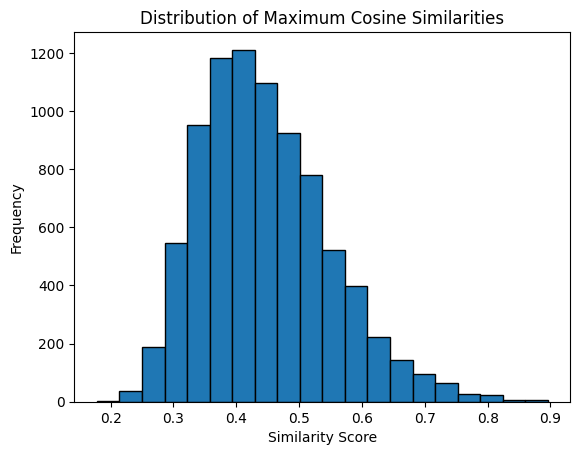

In [ ]:
import matplotlib.pyplot as plt

plt.hist(max_similarities, bins=20, edgecolor='black')
plt.title('Distribution of Maximum Cosine Similarities')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np

mean_sim = np.mean(max_similarities)
median_sim = np.median(max_similarities)
std_sim = np.std(max_similarities)

print(f'Mean Similarity: {mean_sim:.4f}')
print(f'Median Similarity: {median_sim:.4f}')
print(f'Standard Deviation: {std_sim:.4f}')

Mean Similarity: 0.4457
Median Similarity: 0.4326
Standard Deviation: 0.1028


In [ ]:
# Example of a work title with high similarity
high_sim_index = np.argmax(max_similarities)
print(f'High Similarity Title: {work_titles[high_sim_index]}')
print(f'Similarity Score: {max_similarities[high_sim_index]:.4f}')

# Example of a work title with low similarity
low_sim_index = np.argmin(max_similarities)
print(f'Low Similarity Title: {work_titles[low_sim_index]}')
print(f'Similarity Score: {max_similarities[low_sim_index]:.4f}')

High Similarity Title: Toward a Tripartite Model of Intrinsic Motivation
Similarity Score: 0.8958
Low Similarity Title: A Double-PLLs-Based Impedance Reshaping Method for Extending Stability Range of Grid-Following Inverter Under Weak Grid
Similarity Score: 0.1782


In [ ]:
missing_keywords_in_funding = funding_df[funding_df['keywords'].isna()]['work_id']

In [ ]:
sampled_missing_df = sampled_funding_df[sampled_funding_df['work_id'].isin(missing_keywords_in_funding)]

In [ ]:
added_keywords = sampled_missing_df['keywords'].str.split(',').explode().tolist()

In [ ]:
reference_keywords = funding_df[funding_df['keywords'].notna()]['keywords'].str.split(',').explode().unique().tolist()

#old code


In [ ]:
# prompt: check if there are any duplicate work_id in funding df . now print their full row.  remove these duplicated rows, now show me the shape of the data again and check again if there are any duplicated work_id after removing or not.

# Check for duplicate work_ids and print their full rows
duplicate_work_ids = funding_df[funding_df.duplicated(subset=['work_id'], keep=False)]
print("\nRows with duplicate work_ids:")
print(duplicate_work_ids)

# Remove duplicate rows based on 'work_id', keeping the first occurrence
funding_df = funding_df.drop_duplicates(subset=['work_id'], keep='first')

# Display the shape of the DataFrame after removing duplicates
print("\nShape of funding_df after removing duplicates:", funding_df.shape)

# Verify if there are any remaining duplicate work_ids
duplicate_work_ids_after_removal = funding_df[funding_df.duplicated(subset=['work_id'], keep=False)]
if not duplicate_work_ids_after_removal.empty:
    print("\nRemaining rows with duplicate work_ids (after removal):")
    print(duplicate_work_ids_after_removal)
else:
    print("\nNo duplicate work_ids found after removing duplicates.")


Rows with duplicate work_ids:
                                 work_id  \
16315   https://openalex.org/W2795088061   
19691   https://openalex.org/W2795088061   
35177   https://openalex.org/W2934414809   
38132   https://openalex.org/W2934414809   
44450   https://openalex.org/W3013957647   
...                                  ...   
335001  https://openalex.org/W1992614791   
337348  https://openalex.org/W3036607916   
337370  https://openalex.org/W3036607916   
339879  https://openalex.org/W2593758551   
339946  https://openalex.org/W2593758551   

                                               work_title  publication_year  \
16315   Video-calls to reduce loneliness and social is...              2018   
19691   Video-calls to reduce loneliness and social is...              2018   
35177   New Chemical Insights into the Beneficial Role...              2019   
38132   New Chemical Insights into the Beneficial Role...              2019   
44450   Tunable multi-band terahertz absorber

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calculate the number and percentage of missing values in each column
missing_values = funding_df.isnull().sum()
missing_percent = (missing_values / len(funding_df)) * 100

# Create a dataframe to display missing value statistics
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percent})
print(missing_data)

                  Missing Values  Missing Percentage
work_id                        0            0.000000
work_title                     0            0.000000
publication_year               0            0.000000
publication_date               0            0.000000
work_type                      0            0.000000
cited_by_count                 0            0.000000
is_retracted                   0            0.000000
language                      30            0.008798
journal                     1586            0.465130
funder_count                   0            0.000000
funders                        0            0.000000
award_ids                  74311           21.793360
funder_ids                     0            0.000000
keywords                   58930           17.282539


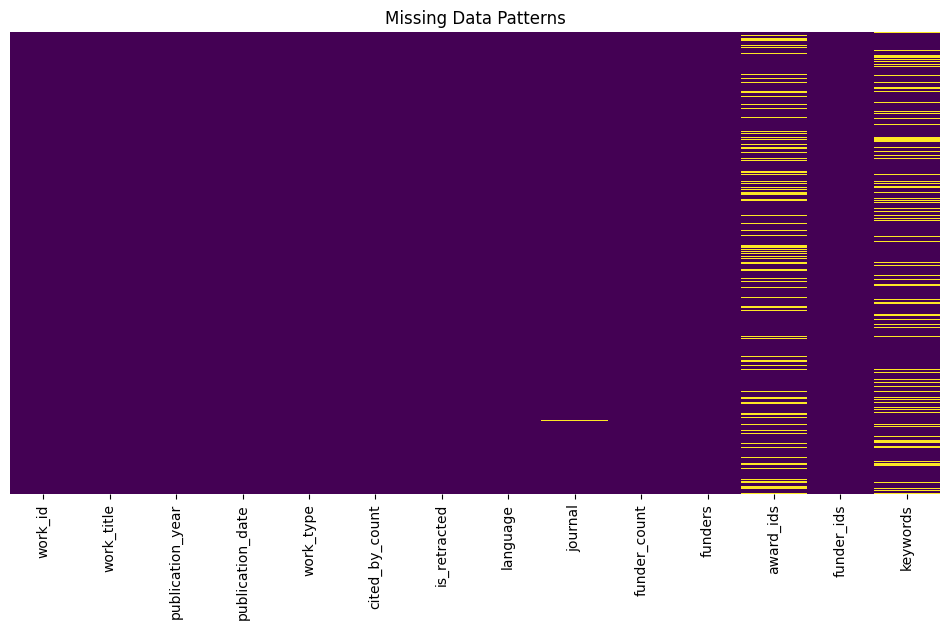

In [ ]:
# Plot the missing data heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(funding_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Patterns')
plt.show()

keywords
Carbon fibers                   1786
Degradation                      592
Nanomaterials                    530
Oxygen evolution                 476
Depression                       413
Visible spectrum                 384
2019-20 coronavirus outbreak     380
Feature (linguistics)            347
Identification                   340
Characterization                 295
Name: count, dtype: int64


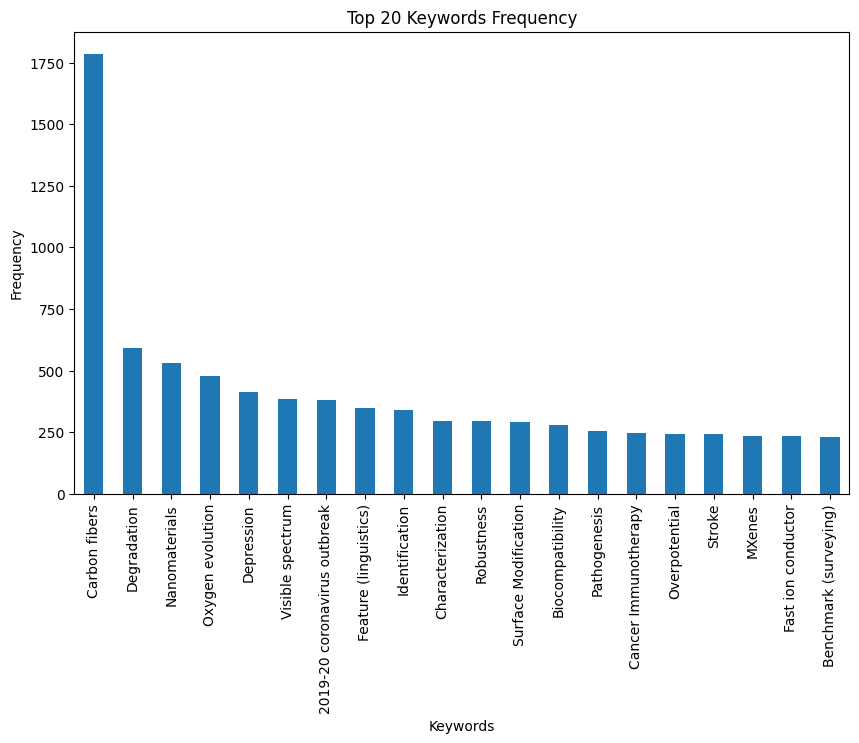

In [ ]:
# Check the unique keywords and their frequencies
keywords_freq = funding_df['keywords'].value_counts()
print(keywords_freq.head(10))

# Visualize the distribution of keywords
plt.figure(figsize=(10, 6))
keywords_freq.head(20).plot(kind='bar')
plt.title('Top 20 Keywords Frequency')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Check the structure of award IDs
print(funding_df['award_ids'].head())

# Determine the number of unique award IDs
print(funding_df['award_ids'].nunique())

# Visualize the distribution of award IDs
# Note: This might not be practical if there are many unique award IDs
# Instead, check the frequency of missing award IDs
award_ids_missing = funding_df['award_ids'].isnull().sum()
print(f"Missing award_ids: {award_ids_missing} out of {len(funding_df)}")

0    No. 61403271, No.61806138, No.U1636220 and No....
1             17H01205; 16J07264; ONR N00014-18-1-2624
2                                   71331004; 71871184
3                                             SFB 1143
4                 61573325; 61503351; 61873347; B17040
Name: award_ids, dtype: object
243093
Missing award_ids: 74311 out of 340980


In [ ]:
# Check for duplicate records
print(f"Number of duplicates: {funding_df.duplicated().sum()}")

# Remove duplicates if necessary
# funding_df = funding_df.drop_duplicates()

Number of duplicates: 0


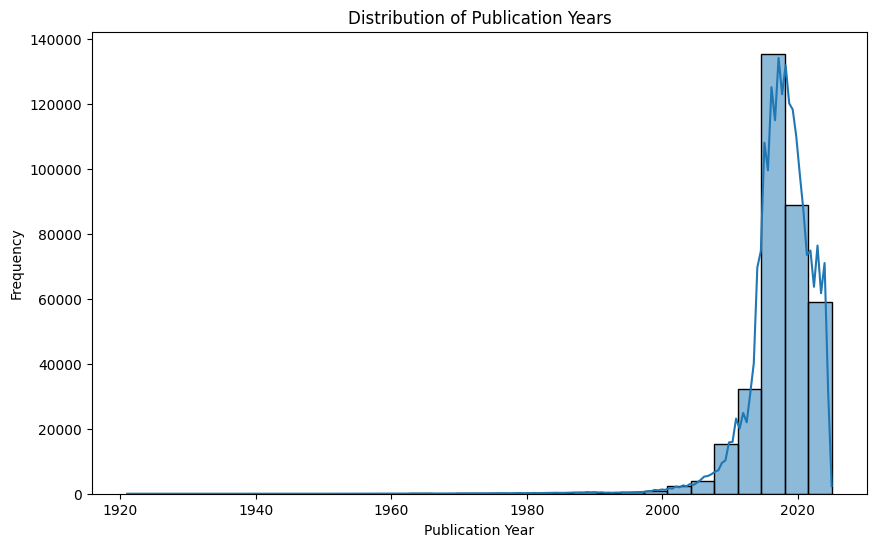

In [ ]:
# Histogram of publication years
plt.figure(figsize=(10, 6))
sns.histplot(funding_df['publication_year'], bins=30, kde=True)
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.show()

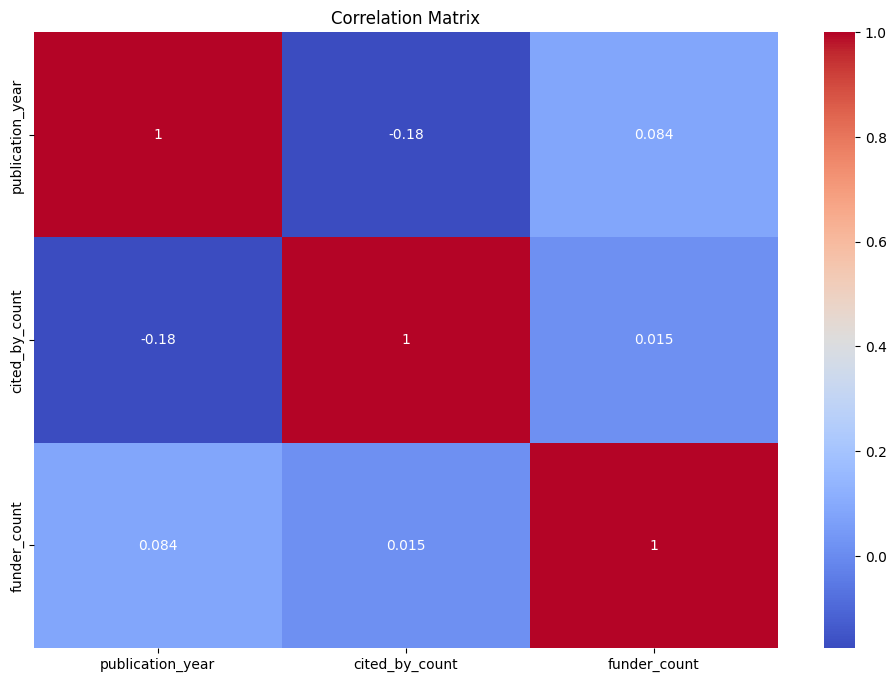

In [ ]:
# Correlation matrix for numerical features
numerical_cols = funding_df.select_dtypes(include=['number']).columns
correlation_matrix = funding_df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Generate summary statistics for numerical columns
print(funding_df.describe())

       publication_year  cited_by_count   funder_count
count     340980.000000   340980.000000  340980.000000
mean        2017.469875      208.632967       2.768790
std            4.917020      323.233782       2.916564
min         1921.000000        3.000000       1.000000
25%         2015.000000      122.000000       1.000000
50%         2018.000000      154.000000       2.000000
75%         2020.000000      223.000000       3.000000
max         2025.000000    40924.000000     180.000000


In [ ]:
# Calculate the number of rows with both 'award_ids' and 'keywords' missing
both_missing = funding_df[funding_df['award_ids'].isnull() & funding_df['keywords'].isnull()]
print("Rows with both award_ids and keywords missing:", both_missing.shape[0])

Rows with both award_ids and keywords missing: 12693


In [ ]:
# Identify columns with missing values
missing_columns = ['language', 'journal', 'award_ids', 'keywords']

# Calculate the number of missing columns per row
funding_df['missing_count'] = funding_df[missing_columns].isnull().sum(axis=1)

# Count the number of rows with 0, 1, 2, or 3 columns missing
missing_counts = funding_df['missing_count'].value_counts().sort_index()

# Print the counts
print("Number of rows with missing columns:")
for i in range(0, 4):
    print(f"{i} columns missing: {missing_counts.get(i, 0)} rows")

Number of rows with missing columns:
0 columns missing: 219187 rows
1 columns missing: 108764 rows
2 columns missing: 12996 rows
3 columns missing: 31 rows


In [ ]:
funding_df

,work_id,work_title,publication_year,publication_date,work_type,cited_by_count,is_retracted,language,journal,funder_count,funders,award_ids,funder_ids,keywords,missing_count
0,https://openalex.org/W2911923116,A Multi-Objective DV-Hop Localization Algorith...,2019,2019-02-15,article,118,False,en,Mathematics,2,National Natural Science Foundation of China; ...,"No. 61403271, No.61806138, No.U1636220 and No....",https://openalex.org/F4320321001; https://open...,NaN,1
1,https://openalex.org/W2912014701,Multicolor Mechanochromism of a Polymer/Silica...,2019,2019-01-24,article,118,False,en,Journal of the American Chemical Society,4,Arnold and Mabel Beckman Foundation; Japan Soc...,17H01205; 16J07264; ONR N00014-18-1-2624,https://openalex.org/F4320306253; https://open...,Mechanochemistry,0
2,https://openalex.org/W2912034847,The effect of supply chain quality management ...,2019,2019-02-01,article,118,False,en,International Journal of Production Economics,2,National Natural Science Foundation of China; ...,71331004; 71871184,https://openalex.org/F4320321001; https://open...,Performance Improvement,0
3,https://openalex.org/W2912182050,Field-induced instability of the quantum spin ...,2019,2019-05-01,article,118,False,en,Physical review. B./Physical review. B,2,Alexander von Humboldt-Stiftung; Deutsche Fors...,SFB 1143,https://openalex.org/F4320308269; https://open...,NaN,1
4,https://openalex.org/W2912199253,Robust $H_{\infty }$ Control for T–S Fuzzy Sys...,2019,2019-01-24,article,118,False,en,IEEE Transactions on Fuzzy Systems,5,National Natural Science Foundation of China; ...,61573325; 61503351; 61873347; B17040,https://openalex.org/F4320321001; https://open...,Linear matrix inequality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341032,https://openalex.org/W3121845213,Topological Classification of Crystalline Insu...,2017,2017-12-22,article,656,False,en,Physical Review X,3,"Simons Foundation; Ministerie van Onderwijs, C...",NaN,https://openalex.org/F4320306164; https://open...,Topological insulator; Crystal (programming la...,1
341033,https://openalex.org/W3126519734,Gut <i>Bacteroides</i> species in health and d...,2021,2021-01-01,review,656,False,en,Gut Microbes,1,National Institutes of Health,GM077402,https://openalex.org/F4320332161,NaN,1
341034,https://openalex.org/W3129166376,A Unifying Review of Deep and Shallow Anomaly ...,2021,2021-02-05,review,656,False,en,Proceedings of the IEEE,8,Deutsche Forschungsgemeinschaft; Deutsche Fors...,Math+; EXC 2046/1; Project ID 390685689; 01GQ0...,https://openalex.org/F4320320879; https://open...,Anomaly (physics),0
341035,https://openalex.org/W1967490826,Chemical Ecology of Endophytic Fungi: Origins ...,2012,2012-07-01,review,655,False,en,Chemistry & Biology,4,"Ministerium für Innovation, Wissenschaft und F...",NaN,https://openalex.org/F4320317289; https://open...,Chemical Ecology; Secondary metabolism; Sustai...,1


In [ ]:
# Step 1: Remove rows with missing 'language' or 'journal'
# Create a mask for rows where 'language' or 'journal' is missing
missing_rows = funding_df['language'].isnull() | funding_df['journal'].isnull()

# Use the mask to filter out the rows
funding_df = funding_df.loc[~missing_rows].copy()  # Use .copy() to avoid chained assignment issues

# Step 2: Replace missing 'award_ids' with NaN
# Use .loc to directly modify the DataFrame without chained assignment
funding_df.loc[:, 'award_ids'] = funding_df['award_ids'].fillna(value=pd.NA)

# Optional: Verify the changes
print("Shape of funding_df after cleaning:", funding_df.shape)
print("Missing values in funding_df:\n", funding_df.isnull().sum())

Shape of funding_df after cleaning: (339367, 15)
Missing values in funding_df:
 work_id                 0
work_title              0
publication_year        0
publication_date        0
work_type               0
cited_by_count          0
is_retracted            0
language                0
journal                 0
funder_count            0
funders                 0
award_ids           74135
funder_ids              0
keywords            58706
missing_count           0
dtype: int64


In [ ]:
# Replace missing 'award_ids' with a placeholder (e.g., "none")
funding_df.loc[:, 'award_ids'] = funding_df['award_ids'].fillna(value="none")

# Verify the changes
print("Missing values in funding_df:\n", funding_df.isnull().sum())

Missing values in funding_df:
 work_id                 0
work_title              0
publication_year        0
publication_date        0
work_type               0
cited_by_count          0
is_retracted            0
language                0
journal                 0
funder_count            0
funders                 0
award_ids               0
funder_ids              0
keywords            58706
missing_count           0
dtype: int64


In [ ]:
import pandas as pd
from openai import OpenAI
from getpass import getpass
import time
import logging
from google.colab import drive
import os

def combine_and_analyze_data():
    # Initialize logging
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
    logging.info("Starting data processing.")

    # Get API key securely
    api_key = getpass("Enter your DeepSeek API key: ")
    client = OpenAI(api_key=api_key, base_url="https://api.deepseek.com")

    # Mount Google Drive
    drive.mount('/content/drive')

    # Specify the folder in Google Drive where the file will be saved
    output_path = '/content/drive/MyDrive/your_folder_path/new_funding.csv'

    # Load the funding_df DataFrame
    # Replace with the actual path to your funding data
    funding_df = pd.read_csv('funding.csv')

    # Remove rows with missing 'language' or 'journal'
    funding_df = funding_df.dropna(subset=['language', 'journal'])
    logging.info(f"Rows after removing missing language or journal: {funding_df.shape[0]}")

    # Replace missing 'award_ids' with "none"
    funding_df['award_ids'] = funding_df['award_ids'].fillna("none")
    logging.info(f"Missing award_ids after replacement: {funding_df['award_ids'].isnull().sum()}")

    # Identify rows with missing 'keywords' but present 'work_title' and 'journal'
    missing_keywords = funding_df[funding_df['keywords'].isnull() & funding_df['work_title'].notnull() & funding_df['journal'].notnull()]
    logging.info(f"Rows needing keyword generation: {missing_keywords.shape[0]}")

    # Function to generate keywords using DeepSeek API
    def generate_keywords(work_title, journal):
        try:
            prompt = f"""Given the work title and journal, generate a list of keywords related to the research work.

            Example 1:
            work_title: A Multi-Objective DV-Hop Localization Algorithm for Wireless Sensor Networks
            journal: Mathematics
            keywords: Wireless sensor networks, localization algorithms, multi-objective optimization

            Example 2:
            work_title: Multicolor Mechanochromism of a Polymer/Silica Nanocomposite Film
            journal: Journal of the American Chemical Society
            keywords: Mechanochromism, nanocomposite films, polymers, silica

            Now, generate keywords for the following:

            work_title: {work_title}
            journal: {journal}
            """
            response = client.chat.completions.create(
                model="deepseek-chat",
                messages=[
                    {"role": "system", "content": "You are a helpful assistant."},
                    {"role": "user", "content": prompt}
                ],
                stream=False
            )
            keywords = response.choices[0].message.content.strip()
            return keywords
        except Exception as e:
            logging.error(f"Error generating keywords for {work_title}: {e}")
            return None

    # Generate keywords for missing entries
    for index, row in missing_keywords.iterrows():
        work_title = row['work_title']
        journal = row['journal']
        if pd.isnull(work_title) or pd.isnull(journal):
            continue  # Skip if work_title or journal is missing
        generated_keywords = generate_keywords(work_title, journal)
        if generated_keywords:
            funding_df.at[index, 'keywords'] = generated_keywords
            logging.info(f"Generated keywords for {work_title}: {generated_keywords}")
        time.sleep(2)  # Delay to avoid rate limits

    # Save the updated DataFrame to Google Drive
    funding_df.to_csv(output_path, index=False)
    logging.info(f"Data saved to {output_path}")

    # Completion indicator
    print("Processing complete.")

# Run the function
combine_and_analyze_data()

Enter your DeepSeek API key: ··········


KeyboardInterrupt: 

# new code


In [ ]:
import pandas as pd
import logging
from openai import openai  # Replace with actual import

ImportError: cannot import name 'openai' from 'openai' (/usr/local/lib/python3.10/dist-packages/openai/__init__.py)

In [ ]:
# Install OpenAI SDK
!pip install openai

# Import necessary libraries
import pandas as pd
import logging
from openai import OpenAI
from google.colab import userdata  # For securely handling API keys

# Set up logging
logging.basicConfig(level=logging.ERROR, filename='keyword_generation_errors.log', filemode='w',
                    format='%(name)s - %(levelname)s - %(message)s')

# Securely load the DeepSeek API key from Google Colab secrets
try:
    api_key = userdata.get('DEEPSEEK_API_KEY')  # Ensure you've saved the API key in Colab secrets
except Exception as e:
    raise Exception("Failed to load API key. Make sure you've added it to Colab secrets.") from e

# Initialize the DeepSeek client
client = OpenAI(api_key=api_key, base_url="https://api.deepseek.com")

# Define the keyword generation function
def generate_keywords(work_title, journal):
    try:
        prompt = f"""Given the work title and journal, generate 2 keywords related to the research work.

        Example 1:
        work_title: A Multi-Objective DV-Hop Localization Algorithm for Wireless Sensor Networks
        journal: Mathematics
        keywords: Wireless sensor networks, localization algorithms

        Example 2:
        work_title: Multicolor Mechanochromism of a Polymer/Silica Nanocomposite Film
        journal: Journal of the American Chemical Society
        keywords: Mechanochromism, nanocomposite films

        Now, generate 2 keywords for the following:

        work_title: {work_title}
        journal: {journal}
        """
        response = client.chat.completions.create(
            model="deepseek-chat",
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            stream=False
        )
        keywords = response.choices[0].message.content.strip()
        return keywords
    except Exception as e:
        logging.error(f"Error generating keywords for {work_title}: {e}")
        return None

# Load the raw funding_df (replace with your actual data loading code)
# Example:
# funding_df = pd.read_csv('funding_data.csv')

# Step 1: Calculate the missing keyword rate in the original funding_df
missing_rate_original = funding_df['keywords'].isna().mean()
print(f"Missing keyword rate in original funding_df: {missing_rate_original:.2%}")

# Step 2: Randomly sample 10,000 records from funding_df
sampled_df = funding_df.sample(n=10000, random_state=42)

# Step 3: Calculate the missing keyword rate in the sampled_df
missing_rate_sampled = sampled_df['keywords'].isna().mean()
print(f"Missing keyword rate in sampled_df: {missing_rate_sampled:.2%}")

# Step 4: Identify records with missing 'keywords'
missing_keywords_df = sampled_df[sampled_df['keywords'].isna()]

# Step 5: Generate keywords for missing records
updated_records = []

for index, row in missing_keywords_df.iterrows():
    work_title = row['work_title']
    journal = row['journal']
    generated_keywords = generate_keywords(work_title, journal)

    if generated_keywords:
        # Update the row with the new keywords
        updated_row = row.copy()
        updated_row['keywords'] = generated_keywords
        updated_records.append(updated_row)
    else:
        # Keep the original row if keyword generation fails
        updated_records.append(row)

# Step 6: Create a DataFrame from the updated records
updated_df = pd.DataFrame(updated_records)

# Step 7: Merge updated keywords back into sampled_df
merged_df = pd.merge(sampled_df, updated_df[['work_id', 'keywords']], on='work_id', how='left', suffixes=('', '_new'))

# Update the keywords where available
merged_df['keywords'] = merged_df['keywords_new'].combine_first(merged_df['keywords'])

# Drop the temporary column
merged_df.drop(columns=['keywords_new'], inplace=True)

# Step 8: Save the updated DataFrame to funding_final
funding_final = merged_df.copy()

# Step 9: Display the final data
print("Final DataFrame with Generated Keywords:")
print(funding_final.head())

# Step 10: Calculate the missing keyword rate in the final DataFrame
missing_rate_final = funding_final['keywords'].isna().mean()
print(f"Missing keyword rate in funding_final: {missing_rate_final:.2%}")

# Optional: Save funding_final to a CSV file
funding_final.to_csv('funding_final.csv', index=False)

print("Keyword generation and data update completed successfully!")

Missing keyword rate in original funding_df: 16.88%
Missing keyword rate in sampled_df: 16.82%
Final DataFrame with Generated Keywords:
                            work_id  \
0  https://openalex.org/W2927761949   
1  https://openalex.org/W4390945514   
2  https://openalex.org/W2738551291   
3  https://openalex.org/W2892719463   
4  https://openalex.org/W2794908677   

                                          work_title  publication_year  \
0  Interface decoration of exfoliated MXene ultra...              2019   
1  A gentle introduction to computer vision‐based...              2024   
2  Large-size graphene-like porous carbon nanoshe...              2017   
3  Cytoprotective metal-organic frameworks for an...              2018   
4  Role of renewable energy in China’s energy sec...              2018   

  publication_date work_type  cited_by_count  is_retracted language  \
0       2019-04-05   article             349         False       en   
1       2024-01-17   article              

In [ ]:
funding_final['journal'].fillna('Unknown', inplace=True)

<ipython-input-45-4f1a530e8e1b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  funding_final['journal'].fillna('Unknown', inplace=True)


In [ ]:
funding_final['award_ids'].fillna('Not Available', inplace=True)

<ipython-input-46-3a353553da93>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  funding_final['award_ids'].fillna('Not Available', inplace=True)


In [ ]:
print("Missing Values After Handling:")
print(funding_final.isna().sum())

Missing Values After Handling:
work_id             0
work_title          0
publication_year    0
publication_date    0
work_type           0
cited_by_count      0
is_retracted        0
language            0
journal             0
funder_count        0
funders             0
award_ids           0
funder_ids          0
keywords            0
is_relevant         0
dtype: int64


In [ ]:
funding_final.dtypes

,0
work_id,object
work_title,object
publication_year,int64
publication_date,object
work_type,object
cited_by_count,int64
is_retracted,bool
language,object
journal,object
funder_count,int64


In [ ]:
researchers_df.dtypes

,0
researcher_id,object
researcher_name,object
total_citations,int64
total_works,int64
h_index,int64
i10_index,int64
concept_1,object
concept_1_score,float64
concept_2,object
concept_2_score,float64


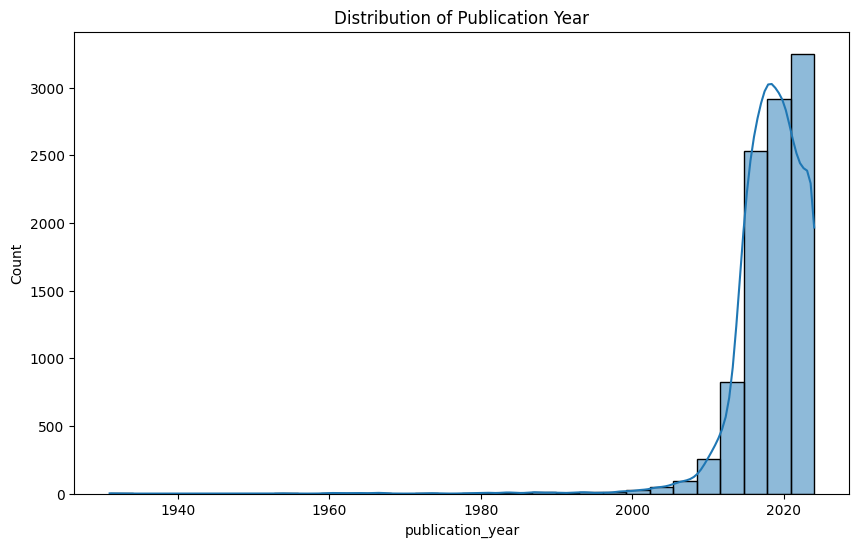

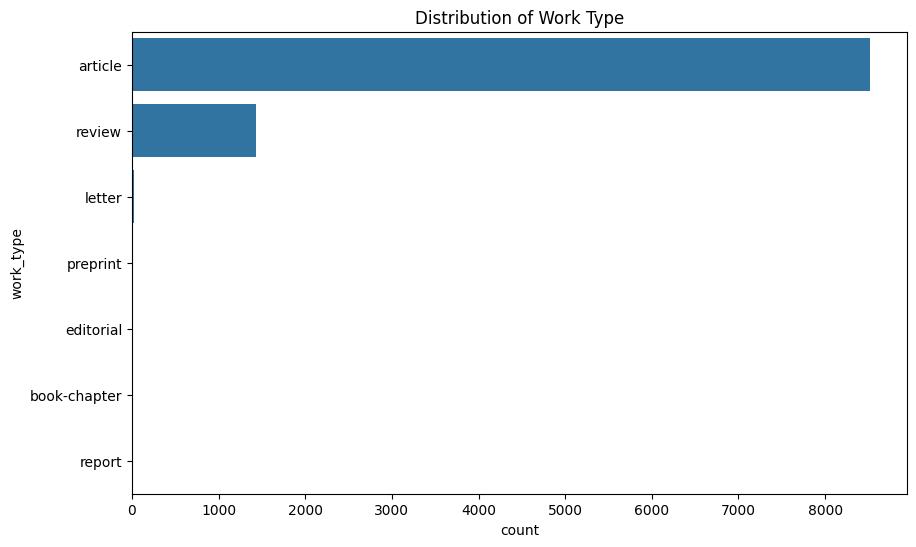

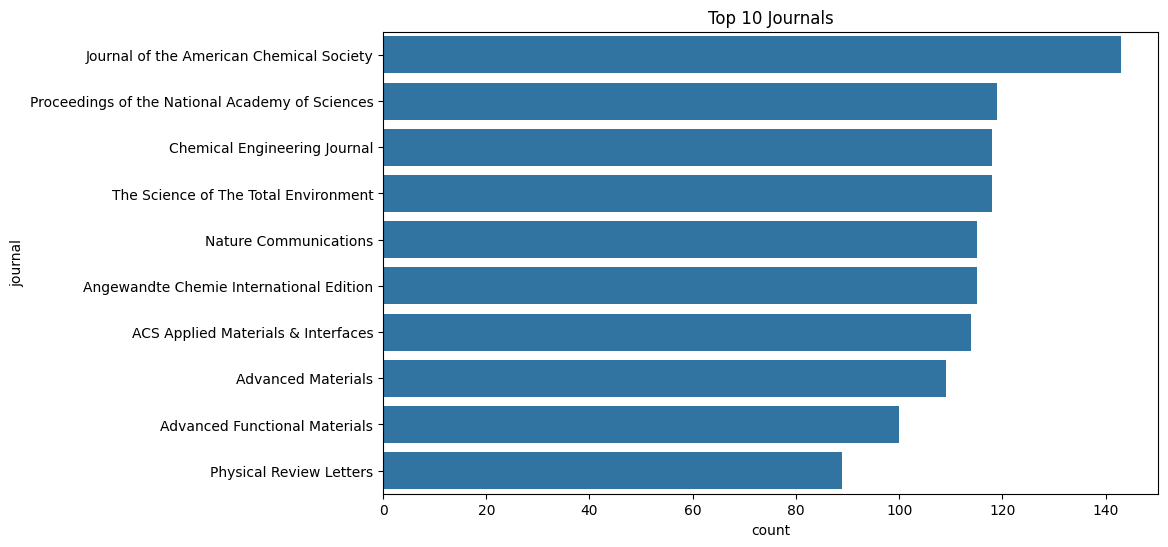

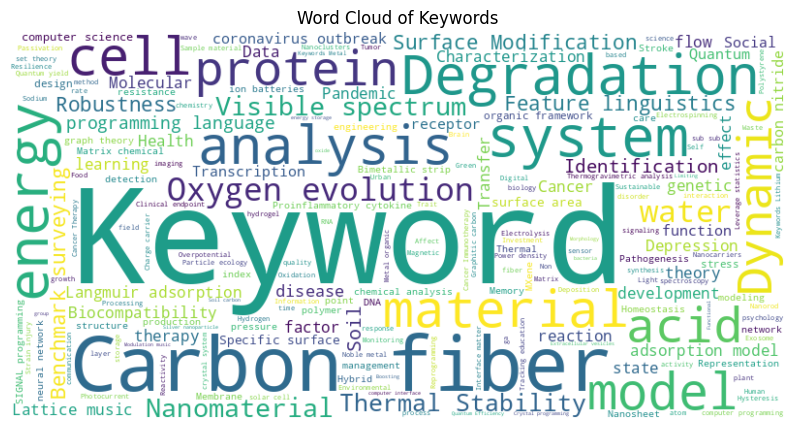

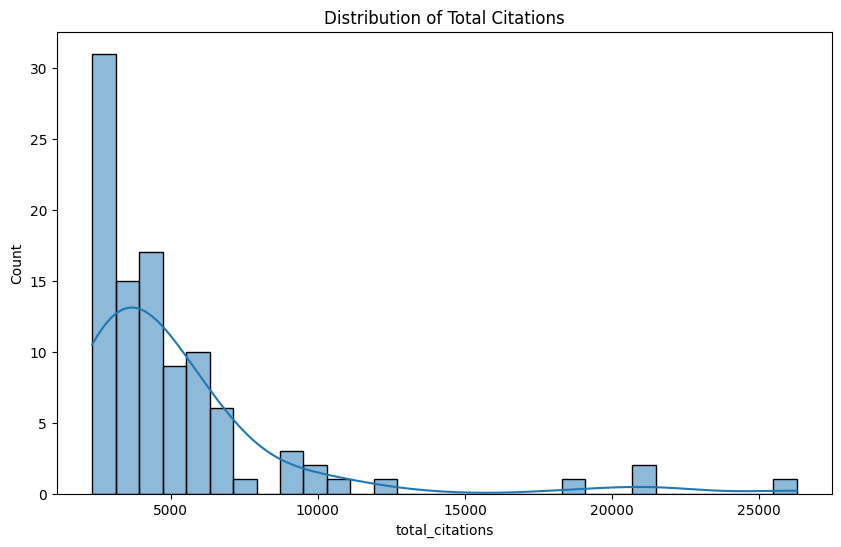

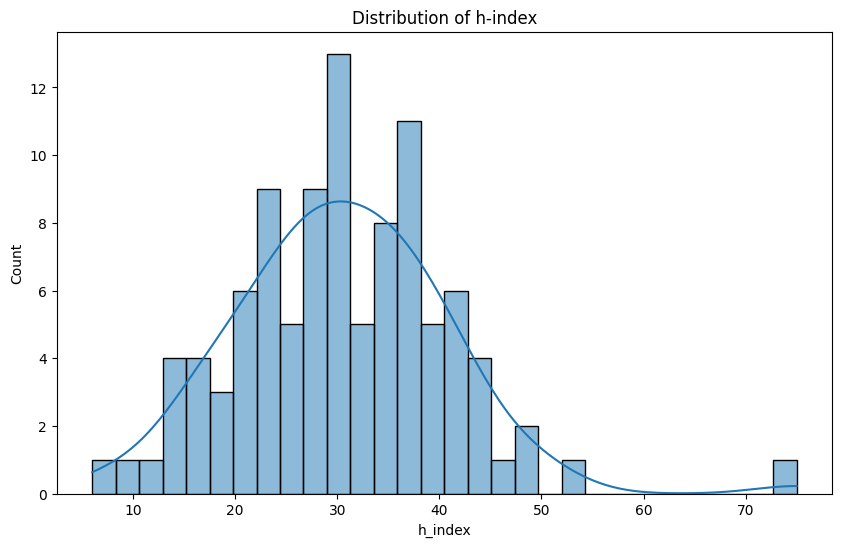

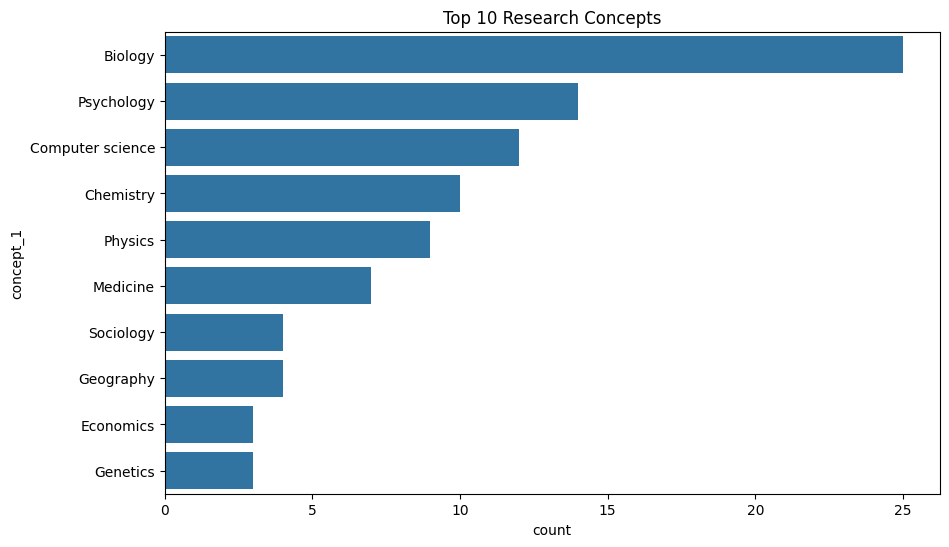

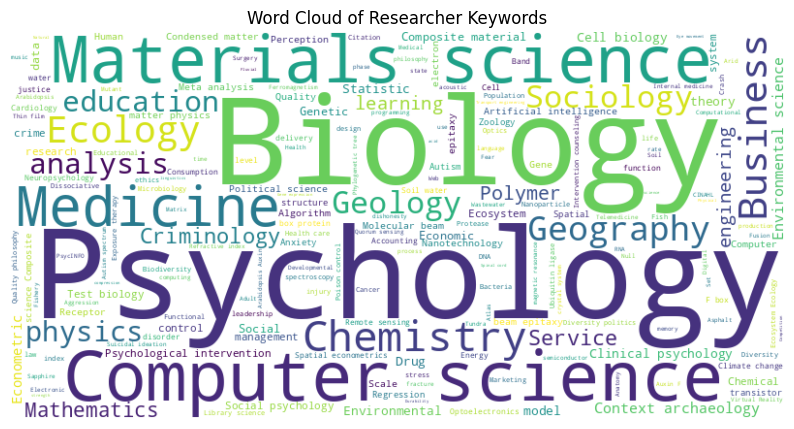

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Funding Data Visualizations
# 1. Distribution of publication_year
plt.figure(figsize=(10, 6))
sns.histplot(funding_final['publication_year'], bins=30, kde=True)
plt.title('Distribution of Publication Year')
plt.show()

# 2. Distribution of work_type
plt.figure(figsize=(10, 6))
sns.countplot(y='work_type', data=funding_final, order=funding_final['work_type'].value_counts().index)
plt.title('Distribution of Work Type')
plt.show()

# 3. Top Journals
plt.figure(figsize=(10, 6))
sns.countplot(y='journal', data=funding_final, order=funding_final['journal'].value_counts().iloc[:10].index)
plt.title('Top 10 Journals')
plt.show()

# 4. Word Cloud for Keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(funding_final['keywords'].dropna().astype(str)))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

# Researchers Data Visualizations
# 1. Distribution of total_citations
plt.figure(figsize=(10, 6))
sns.histplot(researchers_df['total_citations'], bins=30, kde=True)
plt.title('Distribution of Total Citations')
plt.show()

# 2. Distribution of h_index
plt.figure(figsize=(10, 6))
sns.histplot(researchers_df['h_index'], bins=30, kde=True)
plt.title('Distribution of h-index')
plt.show()

# 3. Top Concepts
plt.figure(figsize=(10, 6))
sns.countplot(y='concept_1', data=researchers_df, order=researchers_df['concept_1'].value_counts().iloc[:10].index)
plt.title('Top 10 Research Concepts')
plt.show()

# 4. Word Cloud for Keywords
all_keywords = ' '.join(researchers_df[[f'top_work_{i}_keywords' for i in range(1, 6)]].stack().dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Researcher Keywords')
plt.show()


In [ ]:
# Check if the keyword 'keyword' exists in the 'keywords' column
keyword_check = funding_final['keywords'].str.contains('keyword', case=False, na=False)

# Count the number of records with the keyword 'keyword'
keyword_count = keyword_check.sum()

# Display the count
print(f"Number of records with the keyword 'keyword': {keyword_count}")

# Inspect the records containing the keyword 'keyword'
if keyword_count > 0:
    print("Records with the keyword 'keyword':")
    print(funding_final[keyword_check][['work_id', 'work_title', 'keywords']])

Number of records with the keyword 'keyword': 1627
Records with the keyword 'keyword':
                               work_id  \
3     https://openalex.org/W2892719463   
22    https://openalex.org/W4362521395   
26    https://openalex.org/W4280492433   
27    https://openalex.org/W3085483336   
36    https://openalex.org/W4392938334   
...                                ...   
9985  https://openalex.org/W3048661577   
9986  https://openalex.org/W3186534926   
9987  https://openalex.org/W2091616621   
9989  https://openalex.org/W2061317708   
9992  https://openalex.org/W2810548910   

                                             work_title  \
3     Cytoprotective metal-organic frameworks for an...   
22    A simple and highly efficient strategy to indu...   
26    Molecular‐Level Methylcellulose/MXene Hybrids ...   
27    Challenges and prospects of nanosized silicon ...   
36    Analyzing the risk of the ammonia storage faci...   
...                                                 ..

Number of records with the keyword 'keyword' after cleaning: 1626


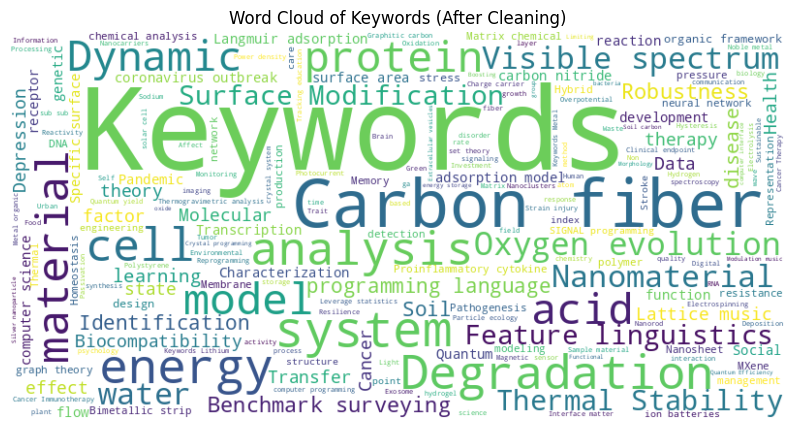

In [ ]:
# Remove the word 'keyword' (case-insensitive) from the 'keywords' column
funding_final['keywords'] = funding_final['keywords'].str.replace(r'\bkeyword\b', '', case=False, regex=True)

# Remove leading/trailing commas and spaces
funding_final['keywords'] = funding_final['keywords'].str.replace(r'^\s*,|\s*,\s*$', '', regex=True)
funding_final['keywords'] = funding_final['keywords'].str.strip()

# Verify the cleaning
keyword_check = funding_final['keywords'].str.contains('keyword', case=False, na=False)
keyword_count = keyword_check.sum()
print(f"Number of records with the keyword 'keyword' after cleaning: {keyword_count}")

# Regenerate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(funding_final['keywords'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords (After Cleaning)')
plt.show()

Number of records with 'keyword' or 'keywords' after cleaning: 0


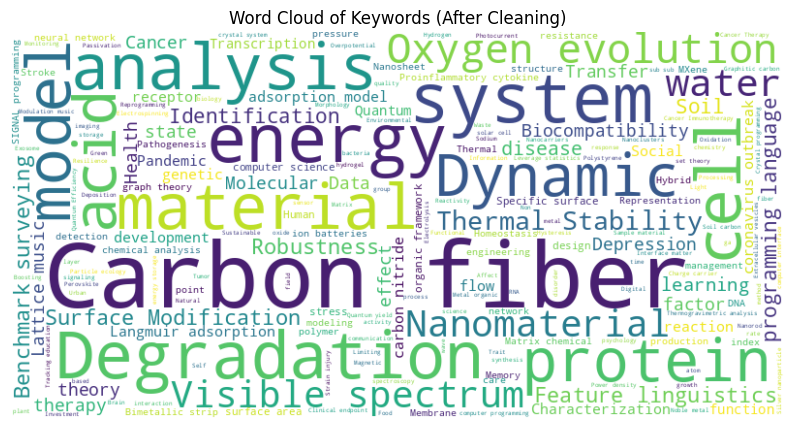

In [ ]:
# Remove the words 'keyword' and 'keywords' (case-insensitive) from the 'keywords' column
funding_final['keywords'] = funding_final['keywords'].str.replace(r'\bkeywords?\b', '', case=False, regex=True)

# Remove leading/trailing commas and spaces
funding_final['keywords'] = funding_final['keywords'].str.replace(r'^\s*,|\s*,\s*$', '', regex=True)
funding_final['keywords'] = funding_final['keywords'].str.strip()

# Verify the cleaning
keyword_check = funding_final['keywords'].str.contains(r'\bkeywords?\b', case=False, na=False)
keyword_count = keyword_check.sum()
print(f"Number of records with 'keyword' or 'keywords' after cleaning: {keyword_count}")

# Regenerate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(funding_final['keywords'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords (After Cleaning)')
plt.show()

# feature engineering


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF for research concepts
tfidf_concepts = TfidfVectorizer(max_features=100)
concept_features = tfidf_concepts.fit_transform(researchers_df['concept_1'] + ' ' + researchers_df['concept_2'])

# TF-IDF for keywords
all_keywords = researchers_df[[f'top_work_{i}_keywords' for i in range(1, 6)]].fillna('').apply(lambda x: ' '.join(x), axis=1)
tfidf_keywords = TfidfVectorizer(max_features=100)
keyword_features = tfidf_keywords.fit_transform(all_keywords)

# Experience feature
researchers_df['is_experienced'] = researchers_df['years_active'] > 10

# Open access feature
researchers_df['high_open_access'] = researchers_df['open_access_ratio'] > 0.5

In [ ]:
# TF-IDF for keywords
tfidf_funding_keywords = TfidfVectorizer(max_features=100)
funding_keyword_features = tfidf_funding_keywords.fit_transform(funding_final['keywords'])

# Temporal features
funding_final['publication_month'] = pd.to_datetime(funding_final['publication_date']).dt.month
funding_final['publication_age'] = 2024 - funding_final['publication_year']

# Citation features
funding_final['normalized_citations'] = funding_final['cited_by_count'] / funding_final['publication_age']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine researcher concepts and funding keywords for consistent vectorization
all_text_data = researchers_df['concept_1'] + ' ' + researchers_df['concept_2'] + ' ' + funding_final['keywords']

# Fit the TF-IDF vectorizer on the combined text data
tfidf = TfidfVectorizer(max_features=100)
tfidf.fit(all_text_data)

# Transform researcher concepts
researcher_concepts = researchers_df['concept_1'] + ' ' + researchers_df['concept_2']
concept_features = tfidf.transform(researcher_concepts)

# Transform funding keywords
funding_keywords = funding_final['keywords']
funding_keyword_features = tfidf.transform(funding_keywords)

# Calculate cosine similarity between researcher concepts and funding keywords
concept_similarity = cosine_similarity(concept_features, funding_keyword_features)

# Display the shape of the similarity matrix
print("Shape of concept similarity matrix:", concept_similarity.shape)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
print("Missing Values in researchers_df:")
print(researchers_df.isna().sum())

Missing Values in researchers_df:
researcher_id          0
researcher_name        0
total_citations        0
total_works            0
h_index                0
i10_index              0
concept_1              0
concept_1_score        0
concept_2              0
concept_2_score        0
years_active           0
recent_works_count     0
recent_citations       0
unique_venues          0
avg_coauthors          0
open_access_ratio      0
top_work_1_id          0
top_work_1_type        0
top_work_1_is_oa       0
top_work_1_keywords    0
top_work_1_source      4
top_work_2_id          0
top_work_2_type        0
top_work_2_is_oa       0
top_work_2_keywords    0
top_work_2_source      3
top_work_3_id          0
top_work_3_type        0
top_work_3_is_oa       0
top_work_3_keywords    0
top_work_3_source      3
top_work_4_id          0
top_work_4_type        0
top_work_4_is_oa       0
top_work_4_keywords    0
top_work_4_source      4
top_work_5_id          0
top_work_5_type        0
top_work_5_is_oa

In [ ]:
# Fill missing values in 'top_work_n_source' columns with 'Unknown'
for i in range(1, 6):
    column_name = f'top_work_{i}_source'
    researchers_df[column_name] = researchers_df[column_name].fillna('Unknown')

# Verify that there are no missing values left
print("Missing Values in researchers_df after handling:")
print(researchers_df.isna().sum())

Missing Values in researchers_df after handling:
researcher_id          0
researcher_name        0
total_citations        0
total_works            0
h_index                0
i10_index              0
concept_1              0
concept_1_score        0
concept_2              0
concept_2_score        0
years_active           0
recent_works_count     0
recent_citations       0
unique_venues          0
avg_coauthors          0
open_access_ratio      0
top_work_1_id          0
top_work_1_type        0
top_work_1_is_oa       0
top_work_1_keywords    0
top_work_1_source      0
top_work_2_id          0
top_work_2_type        0
top_work_2_is_oa       0
top_work_2_keywords    0
top_work_2_source      0
top_work_3_id          0
top_work_3_type        0
top_work_3_is_oa       0
top_work_3_keywords    0
top_work_3_source      0
top_work_4_id          0
top_work_4_type        0
top_work_4_is_oa       0
top_work_4_keywords    0
top_work_4_source      0
top_work_5_id          0
top_work_5_type        0
t

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF for research concepts
tfidf_concepts = TfidfVectorizer(max_features=100)
concept_features = tfidf_concepts.fit_transform(researchers_df['concept_1'] + ' ' + researchers_df['concept_2'])

# TF-IDF for keywords
all_keywords = researchers_df[[f'top_work_{i}_keywords' for i in range(1, 6)]].fillna('').apply(lambda x: ' '.join(x), axis=1)
tfidf_keywords = TfidfVectorizer(max_features=100)
keyword_features = tfidf_keywords.fit_transform(all_keywords)

# Experience feature
researchers_df['is_experienced'] = researchers_df['years_active'] > 10

# Open access feature
researchers_df['high_open_access'] = researchers_df['open_access_ratio'] > 0.5

# Normalized citation features
researchers_df['normalized_citations'] = researchers_df['total_citations'] / researchers_df['years_active']
researchers_df['normalized_h_index'] = researchers_df['h_index'] / researchers_df['years_active']
researchers_df['normalized_i10_index'] = researchers_df['i10_index'] / researchers_df['years_active']

In [ ]:
researchers_df.dtypes

,0
researcher_id,object
researcher_name,object
total_citations,int64
total_works,int64
h_index,int64
i10_index,int64
concept_1,object
concept_1_score,float64
concept_2,object
concept_2_score,float64


In [ ]:
funding_final.dtypes

,0
work_id,object
work_title,object
publication_year,int64
publication_date,object
work_type,object
cited_by_count,int64
is_retracted,bool
language,object
journal,object
funder_count,int64


In [ ]:

# TF-IDF for keywords
tfidf_funding_keywords = TfidfVectorizer(max_features=100)
funding_keyword_features = tfidf_funding_keywords.fit_transform(funding_final['keywords'])

# Temporal features
funding_final['publication_month'] = pd.to_datetime(funding_final['publication_date']).dt.month
funding_final['publication_age'] = 2024 - funding_final['publication_year']

# Citation features
funding_final['normalized_citations'] = funding_final['cited_by_count'] / funding_final['publication_age']

# Binary features for work type
work_type_dummies = pd.get_dummies(funding_final['work_type'], prefix='work_type')
funding_final = pd.concat([funding_final, work_type_dummies], axis=1)

In [ ]:
researchers_df.shape

(100, 51)

In [ ]:
funding_final.shape

(10000, 25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine text data from researchers and funding
researcher_concepts = researchers_df['concept_1'] + ' ' + researchers_df['concept_2']
funding_keywords = funding_final['keywords']
all_text_data = pd.concat([researcher_concepts, funding_keywords])

# Fit the TF-IDF vectorizer on the combined text data
tfidf = TfidfVectorizer(max_features=100)
tfidf.fit(all_text_data)

# Transform researcher concepts
concept_features = tfidf.transform(researcher_concepts)

# Transform funding keywords
funding_keyword_features = tfidf.transform(funding_keywords)

# Calculate cosine similarity between researcher concepts and funding keywords
concept_similarity = cosine_similarity(concept_features, funding_keyword_features)

# Display the shape of the similarity matrix
print("Shape of concept similarity matrix:", concept_similarity.shape)

Shape of concept similarity matrix: (100, 10000)


In [ ]:
concept_similarity

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import numpy as np

# Combine TF-IDF features, normalized citations, and other features
researcher_features = np.hstack([
    concept_features.toarray(),  # TF-IDF for concepts
    keyword_features.toarray(),  # TF-IDF for keywords
    researchers_df[['normalized_citations', 'normalized_h_index', 'normalized_i10_index']].values,  # Normalized citation features
    researchers_df[['is_experienced', 'high_open_access']].values  # Binary features
])

In [ ]:
# Combine TF-IDF features, temporal features, and other features
funding_features = np.hstack([
    funding_keyword_features.toarray(),  # TF-IDF for keywords
    funding_final[['publication_month', 'publication_age', 'normalized_citations']].values,  # Temporal and citation features
    funding_final[['work_type_article', 'work_type_review']].values  # Binary features for work type
])

In [ ]:
# Flatten the concept_similarity matrix and add it as a feature
interaction_features = concept_similarity.flatten().reshape(-1, 1)

In [ ]:
import numpy as np

# 1. Check for infinity or large values in funding_features
print("Number of infinity values in funding_features:", np.isinf(funding_features).sum())
print("Number of extremely large values in funding_features:", (funding_features > 1e10).sum())

# 2. Replace infinity with a large finite value
funding_features[np.isinf(funding_features)] = np.finfo(np.float64).max

# 3. Handle missing values (if any)
print("Number of missing values in funding_features:", np.isnan(funding_features).sum())
funding_features = np.nan_to_num(funding_features, nan=0.0)  # Replace NaN with 0

# 4. Reapply scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
funding_features_scaled = scaler.fit_transform(funding_features)

# Verify the scaled features
print("Scaled funding features (first 5 rows):")
print(funding_features_scaled[:5])

Number of infinity values in funding_features: 874
Number of extremely large values in funding_features: 874
Number of missing values in funding_features: 0
Scaled funding features (first 5 rows):
[[-0.11360896 -0.07416421 -0.13135709 -0.06657353 -0.07796988 -0.08083507
  -0.10817961 -0.16369265 -0.13763869 -0.06803738 -0.08678425 -0.07108092
  -0.06950487 -0.06543256 -0.09331132 -0.07323451 -0.07440614 -0.07268867
  -0.07609134 -0.07209982 -0.10017386 -0.07461369 -0.06751611 -0.08567151
  -0.06730381 -0.07170327 -0.06792061 -0.08965951 -0.0684598  -0.06929012
  -0.12699898 -0.0816777  -0.06853066 -0.10317069 -0.07979208 -0.14230304
  -0.06996454 -0.06902555 -0.06984578 -0.08845734 -0.08298936 -0.07951723
  -0.0718063  -0.06950601 -0.08538727 -0.08044848 -0.07132849 -0.09673889
  -0.08730594 -0.0788299  -0.08743579 -0.08939845 -0.06846962 -0.06800976
  -0.05379709 -0.06885673 -0.09348516 -0.11536986 -0.08331672 -0.07622831
  -0.08393942 -0.08127737 -0.07419912 -0.07081546 -0.11552203 -

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count


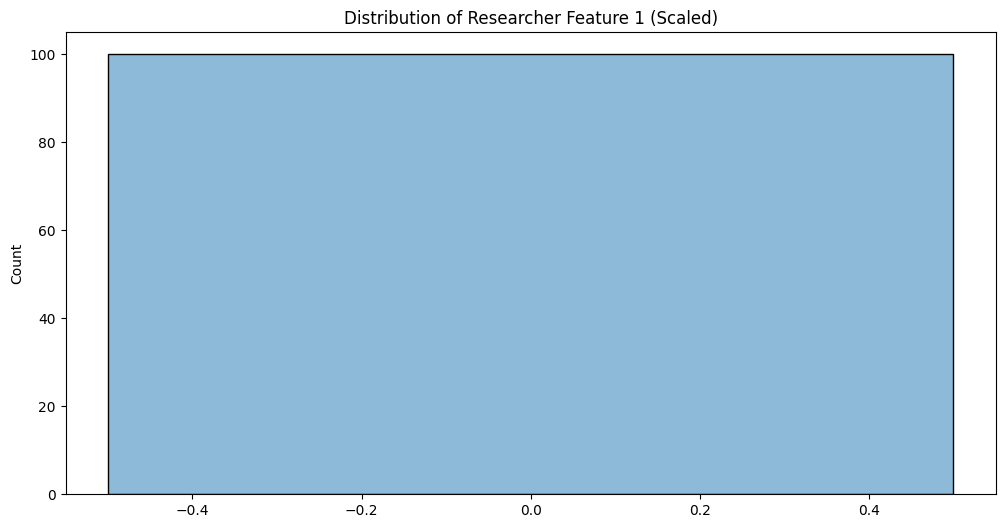

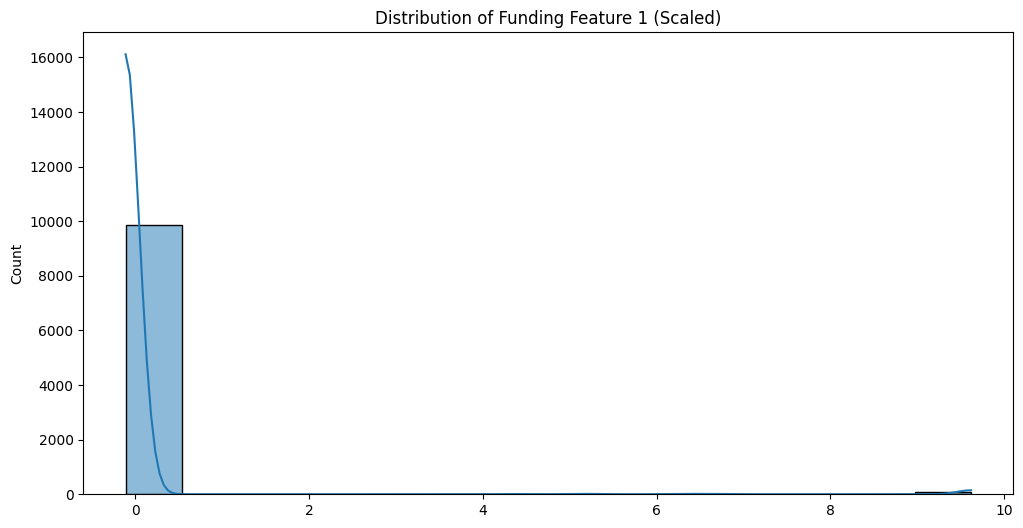

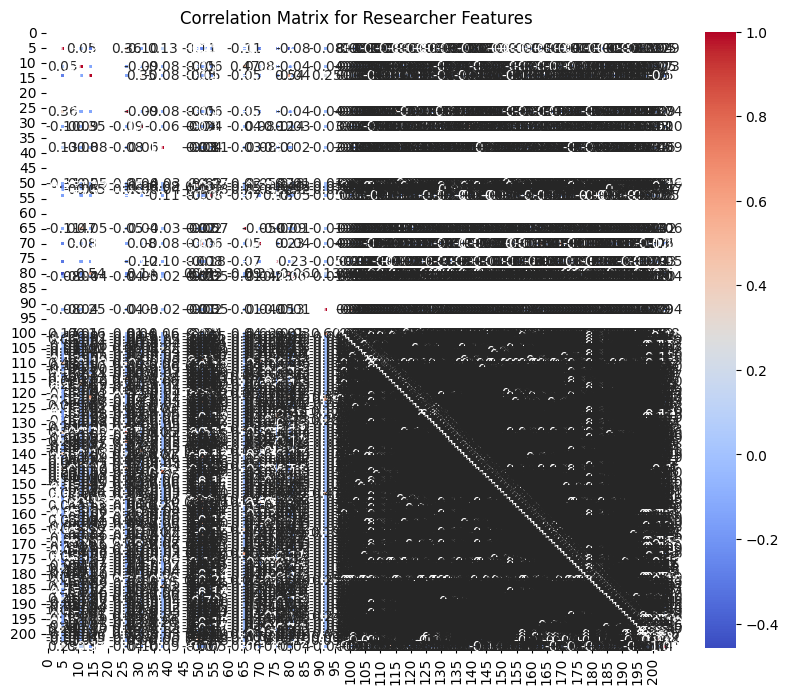

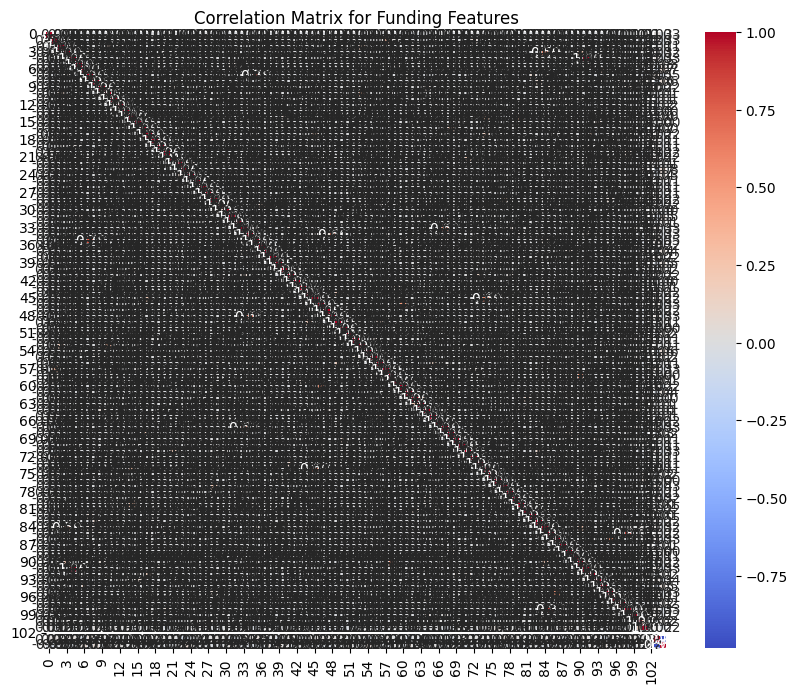

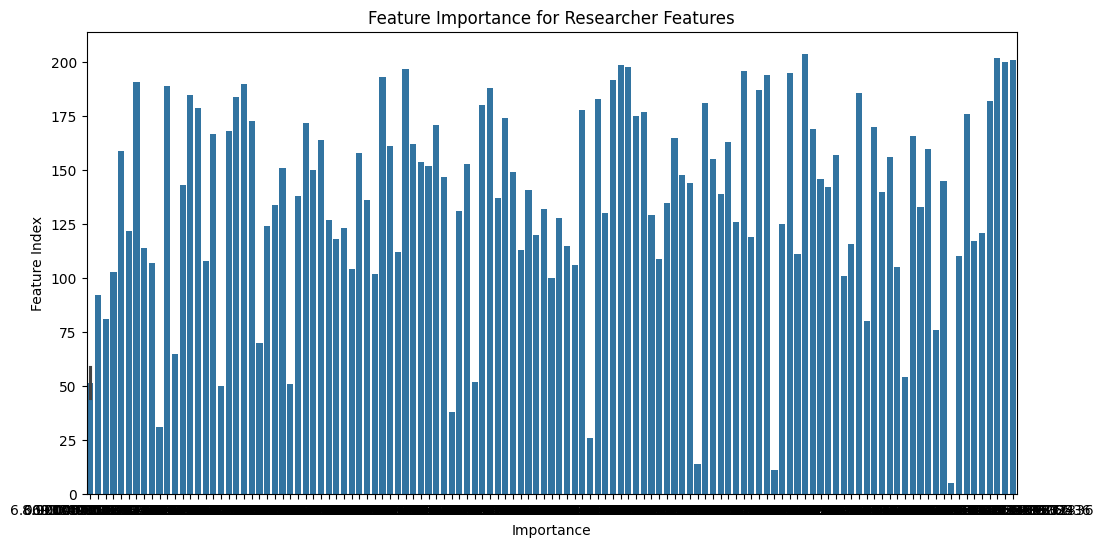

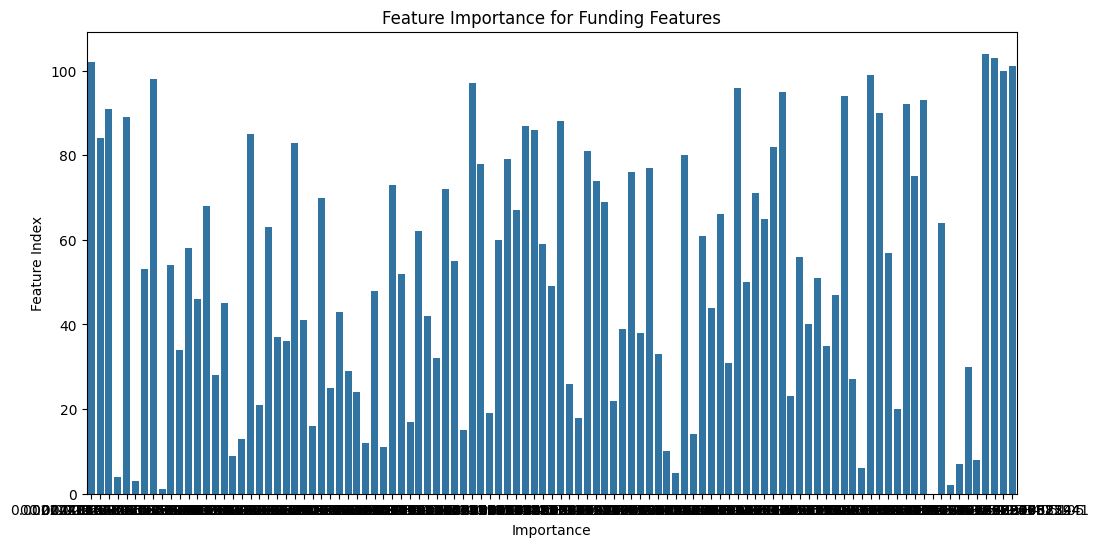

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# 1. Check Feature Distributions
plt.figure(figsize=(12, 6))
sns.histplot(researcher_features_scaled[:, 0], kde=True)  # Example: First feature
plt.title('Distribution of Researcher Feature 1 (Scaled)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(funding_features_scaled[:, 0], kde=True)  # Example: First feature
plt.title('Distribution of Funding Feature 1 (Scaled)')
plt.show()

# 2. Check Feature Correlations
# Example: Correlation matrix for researcher features
researcher_corr = pd.DataFrame(researcher_features_scaled).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(researcher_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Researcher Features')
plt.show()

# Example: Correlation matrix for funding features
funding_corr = pd.DataFrame(funding_features_scaled).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(funding_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Funding Features')
plt.show()

# 3. Check Feature Importance
# Example: Use a Random Forest to evaluate feature importance for researchers
X_researcher = researcher_features_scaled
y_researcher = np.random.randint(0, 2, size=X_researcher.shape[0])  # Dummy target variable

rf_researcher = RandomForestClassifier(random_state=42)
rf_researcher.fit(X_researcher, y_researcher)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_researcher.feature_importances_, y=range(X_researcher.shape[1]))
plt.title('Feature Importance for Researcher Features')
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.show()

# Example: Use a Random Forest to evaluate feature importance for funding
X_funding = funding_features_scaled
y_funding = np.random.randint(0, 2, size=X_funding.shape[0])  # Dummy target variable

rf_funding = RandomForestClassifier(random_state=42)
rf_funding.fit(X_funding, y_funding)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_funding.feature_importances_, y=range(X_funding.shape[1]))
plt.title('Feature Importance for Funding Features')
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.show()

# train the model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [ ]:
# Combine researcher and funding features
X_researcher = researcher_features_scaled  # Scaled researcher features
X_funding = funding_features_scaled        # Scaled funding features

# Create a PyTorch Dataset
class TwoTowerDataset(Dataset):
    def __init__(self, X_researcher, X_funding):
        self.X_researcher = X_researcher
        self.X_funding = X_funding

    def __len__(self):
        return len(self.X_researcher)

    def __getitem__(self, idx):
        return self.X_researcher[idx], self.X_funding[idx]

# Create DataLoader
dataset = TwoTowerDataset(X_researcher, X_funding)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
class TwoTowerModel(nn.Module):
    def __init__(self, researcher_dim, funding_dim, hidden_dim=128):
        super(TwoTowerModel, self).__init__()
        # Researcher Tower
        self.researcher_tower = nn.Sequential(
            nn.Linear(researcher_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        # Funding Tower
        self.funding_tower = nn.Sequential(
            nn.Linear(funding_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        # Similarity Score
        self.similarity = nn.CosineSimilarity(dim=1)

    def forward(self, researcher_features, funding_features):
        researcher_embedding = self.researcher_tower(researcher_features)  # [batch_size, hidden_dim]
        funding_embedding = self.funding_tower(funding_features)          # [batch_size, hidden_dim]
        similarity_score = self.similarity(researcher_embedding, funding_embedding)  # [batch_size]
        return similarity_score

In [ ]:
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.1):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, similarity_scores):
        # Compute the contrastive loss (NT-Xent)
        exp_scores = torch.exp(similarity_scores / self.temperature)
        loss = -torch.log(exp_scores / exp_scores.sum())
        return loss.mean()

In [ ]:
# Check for NaN or inf in researcher features
print("NaN in researcher features:", np.isnan(X_researcher).sum())
print("Inf in researcher features:", np.isinf(X_researcher).sum())

# Check for NaN or inf in funding features
print("NaN in funding features:", np.isnan(X_funding).sum())
print("Inf in funding features:", np.isinf(X_funding).sum())

NaN in researcher features: 0
Inf in researcher features: 0
NaN in funding features: 10000
Inf in funding features: 0


In [ ]:
# Initialize the model
researcher_dim = X_researcher.shape[1]
funding_dim = X_funding.shape[1]
model = TwoTowerModel(researcher_dim, funding_dim)

# Loss function (Contrastive Loss)
criterion = ContrastiveLoss(temperature=0.1)

# Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for batch_researcher, batch_funding in dataloader:
        # Convert to PyTorch tensors
        batch_researcher = torch.tensor(batch_researcher, dtype=torch.float32)
        batch_funding = torch.tensor(batch_funding, dtype=torch.float32)

        # Forward pass
        similarity_scores = model(batch_researcher, batch_funding)  # [batch_size]

        # Compute the loss
        loss = criterion(similarity_scores)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

<ipython-input-95-ac53606f5d75>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_researcher = torch.tensor(batch_researcher, dtype=torch.float32)
<ipython-input-95-ac53606f5d75>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_funding = torch.tensor(batch_funding, dtype=torch.float32)


Epoch [1/10], Loss: nan
Epoch [2/10], Loss: nan
Epoch [3/10], Loss: nan
Epoch [4/10], Loss: nan
Epoch [5/10], Loss: nan
Epoch [6/10], Loss: nan
Epoch [7/10], Loss: nan
Epoch [8/10], Loss: nan
Epoch [9/10], Loss: nan
Epoch [10/10], Loss: nan


In [ ]:
# Check for missing values in funding_final
print("Missing values in funding_final:")
print(funding_final.isna().sum())

Missing values in funding_final:
work_id                   0
work_title                0
publication_year          0
publication_date          0
work_type                 0
cited_by_count            0
is_retracted              0
language                  0
journal                   0
funder_count              0
funders                   0
award_ids                 0
funder_ids                0
keywords                  0
is_relevant               0
publication_month         0
publication_age           0
normalized_citations      0
work_type_article         0
work_type_book-chapter    0
work_type_editorial       0
work_type_letter          0
work_type_preprint        0
work_type_report          0
work_type_review          0
dtype: int64


In [ ]:
# Verify the columns used to create funding_features
print("Columns in funding_final:")
print(funding_final.columns)

Columns in funding_final:
Index(['work_id', 'work_title', 'publication_year', 'publication_date',
       'work_type', 'cited_by_count', 'is_retracted', 'language', 'journal',
       'funder_count', 'funders', 'award_ids', 'funder_ids', 'keywords',
       'is_relevant', 'publication_month', 'publication_age',
       'normalized_citations', 'work_type_article', 'work_type_book-chapter',
       'work_type_editorial', 'work_type_letter', 'work_type_preprint',
       'work_type_report', 'work_type_review'],
      dtype='object')


In [ ]:
# Check for NaN in funding_features
print("NaN in funding_features:", np.isnan(funding_features).sum())
print("Inf in funding_features:", np.isinf(funding_features).sum())

# Inspect the first few rows of funding_features
print("First 5 rows of funding_features:")
print(funding_features[:5])

NaN in funding_features: 0
Inf in funding_features: 0
First 5 rows of funding_features:
[[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00

In [ ]:
# Check for NaN or inf in funding_final
print("NaN in funding_final:", funding_final.isna().sum().sum())
print("Inf in funding_final:", np.isinf(funding_final.select_dtypes(include=[np.number])).sum().sum())

# Check for NaN or inf in researchers_df
print("NaN in researchers_df:", researchers_df.isna().sum().sum())
print("Inf in researchers_df:", np.isinf(researchers_df.select_dtypes(include=[np.number])).sum().sum())

NaN in funding_final: 0
Inf in funding_final: 874
NaN in researchers_df: 0
Inf in researchers_df: 0


In [ ]:
import pandas as pd

In [ ]:
oppurtunities_df= pd.read_csv('/content/opportunity_data-2024-12-27_04-00-47.csv')

ParserError: Error tokenizing data. C error: EOF inside string starting at row 9372

In [ ]:
import pandas as pd

# Attempt to read the CSV with error handling and adjusting parameters
try:
    opportunities_df = pd.read_csv(
        '/content/opportunity_data-2024-12-27_04-00-47.csv',
        on_bad_lines='skip',  # Skip lines with errors
        engine='python'       # Use Python engine for more flexible parsing
    )
    print("CSV file read successfully!")
    print(opportunities_df.shape)
except Exception as e:
    print(f"An error occurred: {e}")

CSV file read successfully!
(58872, 41)


In [ ]:
opportunities_df.columns

Index(['opportunity_id', 'opportunity_number', 'opportunity_title',
       'opportunity_status', 'agency', 'category', 'category_explanation',
       'post_date', 'close_date', 'close_date_description', 'archive_date',
       'is_cost_sharing', 'expected_number_of_awards',
       'estimated_total_program_funding', 'award_floor', 'award_ceiling',
       'additional_info_url', 'additional_info_url_description',
       'opportunity_assistance_listings', 'funding_instruments',
       'funding_categories', 'funding_category_description', 'applicant_types',
       'applicant_eligibility_description', 'agency_code', 'agency_name',
       'top_level_agency_name', 'agency_phone_number',
       'agency_contact_description', 'agency_email_address',
       'agency_email_address_description', 'is_forecast',
       'forecasted_post_date', 'forecasted_close_date',
       'forecasted_close_date_description', 'forecasted_award_date',
       'forecasted_project_start_date', 'fiscal_year', 'created_at',


In [ ]:
import pandas as pd

# Assuming opportunities_df is already loaded
# If not, load the CSV file first:
# opportunities_df = pd.read_csv('/content/opportunity_data-2024-12-27_04-00-47.csv')

# 1. Count the values in the 'opportunity_status' column
status_value_counts = opportunities_df['opportunity_status'].value_counts()
print("Opportunity Status Value Counts:")
print(status_value_counts)

# 2. Filter opportunities with a close_date in 2025 and print their opportunity_number
# Convert 'close_date' to datetime format (if not already)
opportunities_df['close_date'] = pd.to_datetime(opportunities_df['close_date'], errors='coerce')

# Filter for close_date in 2025
opportunities_2025 = opportunities_df[opportunities_df['close_date'].dt.year == 2025]

# Print the opportunity_number for these opportunities
if not opportunities_2025.empty:
    print("\nOpportunities with Close Date in 2025:")
    print(opportunities_2025['opportunity_number'].to_string(index=False))
else:
    print("\nNo opportunities found with a close date in 2025.")

Opportunity Status Value Counts:
opportunity_status
archived      55799
closed         2914
posted          137
forecasted       22
Name: count, dtype: int64

Opportunities with Close Date in 2025:
            PD-98-1680
            PD-98-1311
            PD-09-7252
            PD-11-8031
          FAA-COE-AJFE
            PD-98-1610
            PD-98-1670
     SOL-OAA-15-000054
            PD-16-1271
            PD-18-1268
            PD-18-1269
            PD-18-7970
            PAR-18-799
            PAR-18-812
      W911NF-19-S-0001
                19-575
      7200AA19APS00010
      7200AA19APS00002
      FA8650-19-S-5010
            PD-19-118Y
            PD-19-120Y
            PD-19-127Y
            PD-19-125Y
                20-538
BAA-OAA-E3-ENERGY-2020
         W911NF20S0003
                20-544
                20-554
            PD-20-1281
      7200AA20APS00007
      W911NF-20-S-0008
      7200AA20APS00009


In [ ]:
import pandas as pd

# Assuming opportunities_df is already loaded
# If not, load the CSV file first:
# opportunities_df = pd.read_csv('/content/opportunity_data-2024-12-27_04-00-47.csv')

# Convert 'close_date' to datetime format (if not already)
opportunities_df['close_date'] = pd.to_datetime(opportunities_df['close_date'], errors='coerce')

# Filter for close_date in 2025
opportunities_2025 = opportunities_df[opportunities_df['close_date'].dt.year == 2025]

# Check if there are any opportunities with a close date in 2025
if not opportunities_2025.empty:
    # Calculate value counts for 'opportunity_status' in 2025
    status_value_counts_2025 = opportunities_2025['opportunity_status'].value_counts()
    print("Opportunity Status Value Counts for 2025:")
    print(status_value_counts_2025)

    # Print the opportunity_number for these opportunities
    print("\nOpportunities with Close Date in 2025:")
    print(opportunities_2025['opportunity_number'].to_string(index=False))
else:
    print("No opportunities found with a close date in 2025.")

Opportunity Status Value Counts for 2025:
opportunity_status
posted    32
Name: count, dtype: int64

Opportunities with Close Date in 2025:
            PD-98-1680
            PD-98-1311
            PD-09-7252
            PD-11-8031
          FAA-COE-AJFE
            PD-98-1610
            PD-98-1670
     SOL-OAA-15-000054
            PD-16-1271
            PD-18-1268
            PD-18-1269
            PD-18-7970
            PAR-18-799
            PAR-18-812
      W911NF-19-S-0001
                19-575
      7200AA19APS00010
      7200AA19APS00002
      FA8650-19-S-5010
            PD-19-118Y
            PD-19-120Y
            PD-19-127Y
            PD-19-125Y
                20-538
BAA-OAA-E3-ENERGY-2020
         W911NF20S0003
                20-544
                20-554
            PD-20-1281
      7200AA20APS00007
      W911NF-20-S-0008
      7200AA20APS00009


In [ ]:
opportunities_df.dtypes

,0
opportunity_id,int64
opportunity_number,object
opportunity_title,object
opportunity_status,object
agency,object
category,object
category_explanation,object
post_date,object
close_date,datetime64[ns]
close_date_description,object


In [ ]:
opportunities_df['close_date'] = pd.to_datetime(opportunities_df['close_date'], errors='coerce')

# Filter for close_date in 2025
opportunities_2025 = opportunities_df[opportunities_df['close_date'].dt.year == 2025]

# Display the filtered DataFrame
if not opportunities_2025.empty:
    print("Opportunities with Close Date in 2025:")
    display(opportunities_2025)  # Use display() for better formatting in Jupyter notebooks
    # Alternatively, use print(opportunities_2025) for a plain text output
else:
    print("No opportunities found with a close date in 2025.")

Opportunities with Close Date in 2025:


,opportunity_id,opportunity_number,opportunity_title,opportunity_status,agency,category,category_explanation,post_date,close_date,close_date_description,...,is_forecast,forecasted_post_date,forecasted_close_date,forecasted_close_date_description,forecasted_award_date,forecasted_project_start_date,fiscal_year,created_at,updated_at,summary_description
3198,45793,PD-98-1680,Ocean Technology and Interdisciplinary Coordin...,posted,NSF,discretionary,NaN,2009-03-05,2025-02-17,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2009-03-05T23:13:57+00:00,2024-03-02T06:00:20+00:00,The Oceanographic Technology and Interdiscipli...
3209,45812,PD-98-1311,Linguistics,posted,NSF,discretionary,NaN,2009-03-06,2025-01-15,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2009-03-06T15:31:55+00:00,2024-07-31T05:00:06+00:00,The Linguistics Program supports basic science...
3214,45817,PD-09-7252,"Perception, Action & Cognition",posted,NSF,discretionary,NaN,2009-03-06,2025-02-03,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2009-03-06T15:43:52+00:00,2024-08-09T05:00:08+00:00,The aim of the PAC program is to support empir...
14118,112354,PD-11-8031,Science of Organizations,posted,NSF,discretionary,NaN,2011-08-08,2025-02-03,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-08T18:13:58+00:00,2024-09-19T05:00:15+00:00,"Organizations -- private and public, establish..."
23736,243973,FAA-COE-AJFE,Center of Excellence for Alternative Jet Fuels...,posted,DOT-FAA-FAA COE-AJFE,discretionary,NaN,2023-11-13,2025-09-30,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2013-09-30T20:26:06+00:00,2024-12-05T19:51:29+00:00,<p>The opportunity for the Federal Aviation Ad...
30096,275148,PD-98-1610,Physical Oceanography,posted,NSF,discretionary,NaN,2015-03-13,2025-02-17,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-13T14:40:23+00:00,2024-08-31T05:00:05+00:00,The Physical Oceanography Program supports res...
30097,275150,PD-98-1670,Chemical Oceanography,posted,NSF,discretionary,NaN,2015-03-13,2025-02-18,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-13T14:41:54+00:00,2024-08-31T05:00:05+00:00,TheChemical OceanographyProgram supports resea...
30111,275168,SOL-OAA-15-000054,"Annual Program Statement - Policy, Advocacy, a...",posted,USAID,discretionary,NaN,2015-03-13,2025-03-12,Please note that the APS closing date has been...,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-13T21:50:29+00:00,2020-01-09T22:34:23+00:00,<p><strong><em><u>The Round 2 Call for Concept...
32738,278447,PD-16-1271,Computational Mathematics,posted,NSF,discretionary,NaN,2015-08-13,2025-12-01,"December 1-15, annually",...,False,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-13T05:00:09+00:00,2024-12-10T06:00:05+00:00,Supports mathematical research in areas where ...
47611,302270,PD-18-1268,Foundations,posted,NSF,discretionary,NaN,2018-03-29,2025-09-23,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-29T05:00:17+00:00,2024-10-10T05:00:06+00:00,The program in Foundations supports research i...


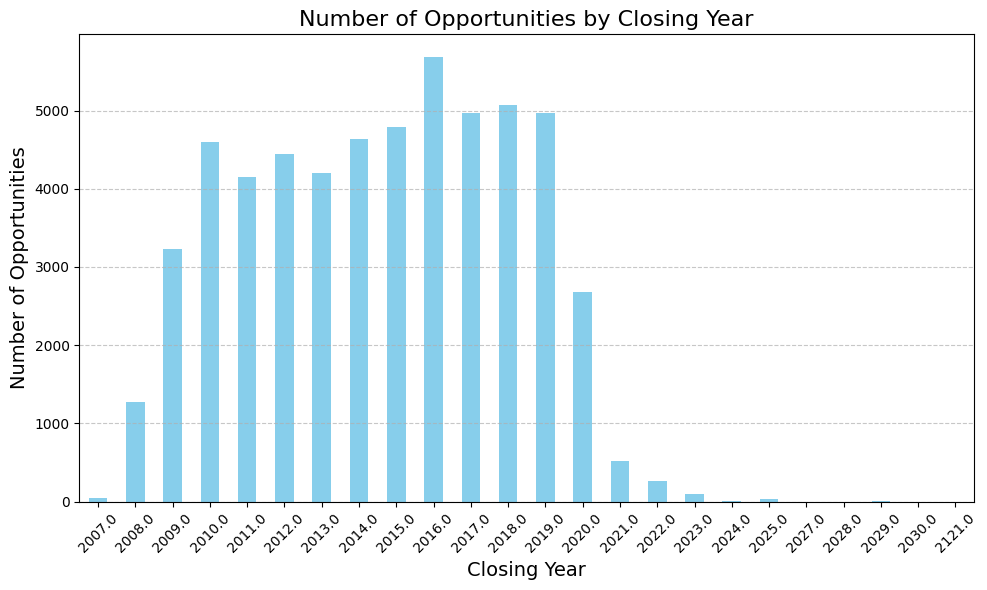

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming opportunities_df is already loaded
# Extract the year from the 'close_date' column
opportunities_df['close_year'] = opportunities_df['close_date'].dt.year

# Count the number of opportunities for each year
close_year_counts = opportunities_df['close_year'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
close_year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Opportunities by Closing Year', fontsize=16)
plt.xlabel('Closing Year', fontsize=14)
plt.ylabel('Number of Opportunities', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()